# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from nltk.corpus import stopwords
stop=stopwords.words("english")

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier , LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pickle
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.svm import LinearSVC

In [3]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1", engine='python')
df.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df1=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis = 1)
df1.head(2)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [5]:
df1['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df1.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


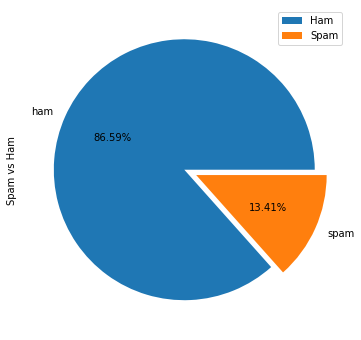

In [7]:
df1["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [8]:
#text Preprocessing
#lowering text
df['text']=df['text'].str.lower()
#removing text address
df['text']=df['text'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)
#remove IP address
df['text'] = df['text'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex = True)

#remove punctaitions and special chracters
df['text'] = df['text'].str.replace('[^\w\s]','' , regex = True)

#remove numbers
df['text'] = df['text'].replace('\d', '', regex=True)

In [9]:
#remove stop words
for index, row in df.iterrows():
    word_tokens = word_tokenize(row['text'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    df.at[index , 'text'] = " ".join(filtered_sentence[0:])

In [10]:
df1['label']=df1['label'].map({"ham":0,"spam":1})

In [11]:
x= df1.iloc[:,-1]
y=df1.iloc[:,0:1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=0,shuffle=True,stratify=y)

In [13]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english', token_pattern=r'\w{1,}')
logreg = LogisticRegression(random_state = 1672)
bayes = MultinomialNB()
sgd = SGDClassifier(alpha=1e-05 , max_iter=50 , penalty = 'elasticnet')
linearsvc=LinearSVC()


logreg_pipe = Pipeline([('vector', tfidf), ('model', logreg)])
bayes_pipe = Pipeline([('vector', tfidf), ('model', bayes)])
sgd_pipe = Pipeline([('vector',tfidf),('model',sgd)])
svc_pipe=Pipeline([('vector',tfidf),('model',linearsvc)])

In [14]:
log=logreg_pipe.fit(X_train,y_train)

In [15]:
bayes = bayes_pipe.fit(X_train,y_train)

In [16]:
sgd = sgd_pipe.fit(X_train,y_train)

In [17]:
svc=svc_pipe.fit(X_train,y_train)

In [18]:
log_pred=log.predict(X_test)

In [19]:
bayes_pred = bayes.predict(X_test)

In [20]:
sgd_pred=sgd.predict(X_test)

In [21]:
svc_pred=svc.predict(X_test)

In [22]:
print(classification_report(log_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1507
           1       0.73      0.99      0.84       165

    accuracy                           0.96      1672
   macro avg       0.86      0.97      0.91      1672
weighted avg       0.97      0.96      0.96      1672



In [23]:
print(accuracy_score(log_pred,y_test))

0.9623205741626795


In [24]:
print(confusion_matrix(log_pred,y_test))

[[1446   61]
 [   2  163]]


In [25]:
print(classification_report(bayes_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1504
           1       0.75      1.00      0.86       168

    accuracy                           0.97      1672
   macro avg       0.88      0.98      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [26]:
print(accuracy_score(bayes_pred,y_test))

0.9665071770334929


In [27]:
print(confusion_matrix(bayes_pred,y_test))

[[1448   56]
 [   0  168]]


In [28]:
print(classification_report(sgd_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1461
           1       0.90      0.96      0.93       211

    accuracy                           0.98      1672
   macro avg       0.95      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [29]:
print(accuracy_score(sgd_pred,y_test))

0.9814593301435407


In [30]:
print(confusion_matrix(sgd_pred,y_test))

[[1439   22]
 [   9  202]]


In [31]:
print(classification_report(svc_pred,y_test))
print(confusion_matrix(svc_pred,y_test))
print(accuracy_score(svc_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1473
           1       0.88      0.98      0.93       199

    accuracy                           0.98      1672
   macro avg       0.94      0.98      0.96      1672
weighted avg       0.98      0.98      0.98      1672

[[1445   28]
 [   3  196]]
0.9814593301435407


# Making some predictions from the models

In [32]:


sms = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.",
       "Too late. I said i have the website. I didn't i have or dont have the slippers",
       "Sir, i am waiting for your call, once free please call me.",
       "how are you? I miss you!"]




In [33]:
predictions=log.predict(sms)
predictions

array([0, 0, 0, 0], dtype=int64)

In [34]:
result = np.where(predictions == 1, 'Spam', 'Ham')
result

array(['Ham', 'Ham', 'Ham', 'Ham'], dtype='<U4')

In [35]:
pred1=sgd.predict(sms)
answer=np.where(pred1==1,'Spam','Ham')
answer

array(['Ham', 'Ham', 'Ham', 'Ham'], dtype='<U4')

In [36]:
pred2=bayes.predict(sms)
ans=np.where(pred2==1,'Spam','Ham')
ans

array(['Spam', 'Ham', 'Ham', 'Ham'], dtype='<U4')

In [37]:
text=["Congrats! Get Free Bajaj Financial Securities Trading A/C. with '0' Opening Charges in 10 Mins. Open Now: http://1kx.in/rpAXIZ"]

In [38]:
pred3=svc.predict(text)
ans=np.where(pred3==1,'Spam','Ham')
ans

array(['Spam'], dtype='<U4')

In [39]:
pred4=svc.predict(sms)
ans=np.where(pred4==1,'Spam','Ham')
ans

array(['Spam', 'Ham', 'Ham', 'Ham'], dtype='<U4')

In [40]:
text1 = ["Hello! I have called you but you didn't pick up, Callback Please"]

In [41]:
pred5=svc.predict(text1)
ans=np.where(pred5==1,'Spam','Ham')
ans

array(['Ham'], dtype='<U4')

In [42]:
text2 = ["Lenskart store at Crown Interiorz Mall is now open for your essential Eyewear needs. Call 9873401513 Directions lskt.me/u4 App lskt.me/z4"]

In [43]:
pred6=svc.predict(text2)
ans=np.where(pred6==1,'Spam','Ham')
ans

array(['Ham'], dtype='<U4')

In [44]:
txt = ["Upto 50% OFF + BUY1GET1 FREE on Eye & Sunglasses at Lenskart's Father's Day Sale. Offer valid till 20 June. Hurry limited Stocks! TnC Shop lskt.me/FatherDay"]

In [45]:
pred7=svc.predict(txt)
ans=np.where(pred7==1,'Spam','Ham')
ans

array(['Ham'], dtype='<U4')

In [46]:
txt1=["Congratulations You've Won a $1000 Walmart Gift Card.Go to http://bit.ly/123456 to claim now"]

In [47]:
pred8=svc.predict(txt1)
ans=np.where(pred8==1,'Spam','Ham')
ans

array(['Spam'], dtype='<U4')

In [48]:
txt2 = ["Your Ipad , Black or Silver waiting .Snag it here : d8fdg9.com/8567879 hboeakm"]

In [49]:
pred9=svc.predict(txt2)
ans=np.where(pred9==1,'Spam','Ham')
ans

array(['Ham'], dtype='<U4')

In [50]:
pred8=log.predict(txt2)
ans=np.where(pred8==1,'Spam','Ham')
ans

array(['Ham'], dtype='<U4')

In [51]:
pred8=bayes.predict(txt2)
ans=np.where(pred8==1,'Spam','Ham')
ans

array(['Ham'], dtype='<U4')

In [52]:
pred8=sgd.predict(txt2)
ans=np.where(pred8==1,'Spam','Ham')
ans

array(['Ham'], dtype='<U4')